In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv(r'C:\Users\user\workspace\c11\Python\data\gdp_percapita.csv')

In [3]:
gdp_df.head(5)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [4]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


In [5]:
gdp_df.shape

(8219, 4)

8219 rows, 4 columns

In [6]:
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


Country or Area - object, Year - int64, Value - float64, Value Footnotes - float64

In [7]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [8]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [61]:
gdp_df.Year.value_counts().to_frame().reset_index()

,Year,count
0,2020,247
1,2021,247
2,2013,247
3,2016,247
4,2019,247
5,2018,247
6,2017,247
7,2014,247
8,2015,247
9,2022,246


In [10]:
gdp_df.Country.value_counts()

Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Andorra                        34
Algeria                        34
                               ..
Faroe Islands                  16
Kosovo                         16
Sint Maarten (Dutch part)      15
Turks and Caicos Islands       13
Djibouti                       11
Name: count, Length: 247, dtype: int64

In [11]:
type_counts = gdp_df.Country.value_counts()

In [12]:
type_counts.head()

Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Andorra                        34
Algeria                        34
Name: count, dtype: int64

In [13]:
type(type_counts)

pandas.core.series.Series

In [14]:
type_counts = type_counts.to_frame()

In [15]:
type(type_counts)

pandas.core.frame.DataFrame

In [16]:
type_counts.head(2)

,count
Country,
Africa Eastern and Southern,34
Africa Western and Central,34


In [17]:
type_counts = type_counts.reset_index()
type_counts

,Country,count
0,Africa Eastern and Southern,34
1,Africa Western and Central,34
2,Albania,34
3,Andorra,34
4,Algeria,34
...,...,...
242,Faroe Islands,16
243,Kosovo,16
244,Sint Maarten (Dutch part),15
245,Turks and Caicos Islands,13


In [18]:
type_counts.sort_values(by = 'count', ascending = False)

,Country,count
0,Africa Eastern and Southern,34
1,Africa Western and Central,34
2,Albania,34
3,Andorra,34
4,Algeria,34
...,...,...
242,Faroe Islands,16
243,Kosovo,16
244,Sint Maarten (Dutch part),15
245,Turks and Caicos Islands,13


In [19]:
gdp_df.isnull().sum()

Country           0
Year              0
GDP_Per_Capita    0
dtype: int64

In [21]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


In [22]:
countries_data_missing = (type_counts["count"] < 34).sum()
print(countries_data_missing)

19


19 countries with missing year data

In [23]:
countries_complete = (type_counts["count"] == 34).sum()
print(countries_complete)

228


228 countries no missing year data

In [24]:
graph_year = [2020]

In [25]:
gdp_2020 = gdp_df.loc[gdp_df.Year.isin(graph_year)]

In [26]:
type(gdp_2020)

pandas.core.frame.DataFrame

In [27]:
gdp_2020.head()

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748


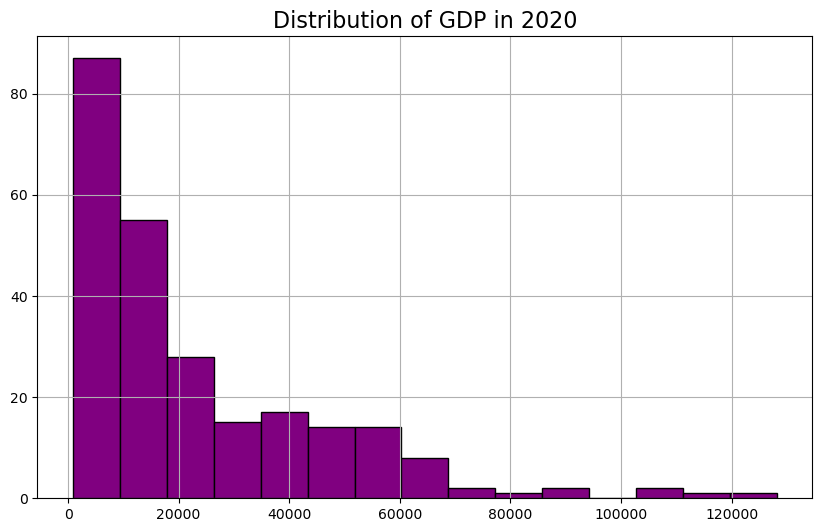

In [28]:
gdp_2020['GDP_Per_Capita'].hist(bins = 15, color = 'purple', edgecolor = 'black', figsize = (10,6))
plt.title('Distribution of GDP in 2020', fontsize = 16);

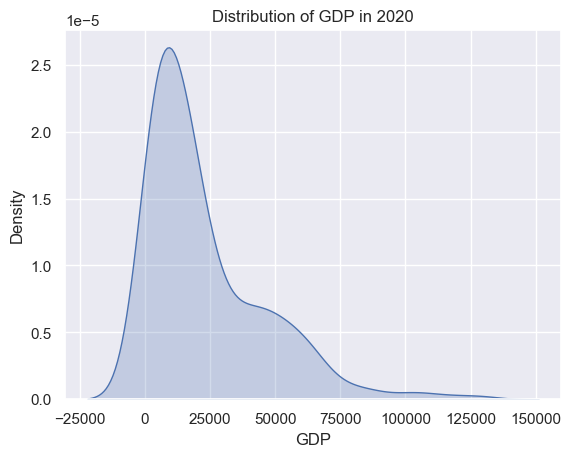

In [31]:
sns.set_theme(style='darkgrid')
sns.kdeplot(gdp_2020['GDP_Per_Capita'], fill=True)
plt.title('Distribution of GDP in 2020')
plt.xlabel('GDP')
plt.show()

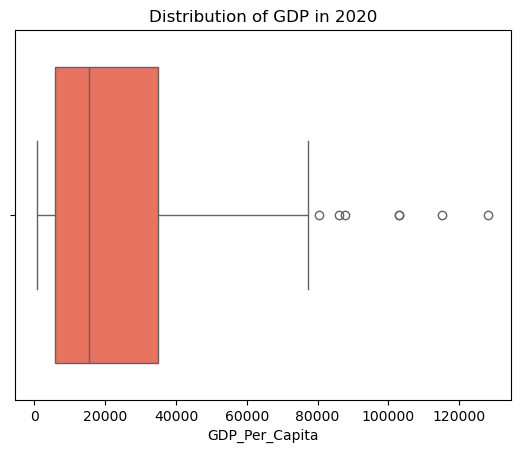

In [29]:
sns.boxplot(data=gdp_2020, x='GDP_Per_Capita', color = 'tomato')
plt.title('Distribution of GDP in 2020')
plt.show()

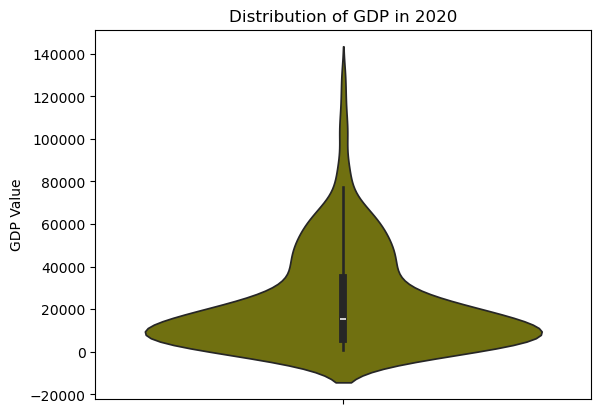

In [30]:
sns.violinplot(y=gdp_2020['GDP_Per_Capita'], color = 'olive')
plt.title('Distribution of GDP in 2020')
plt.ylabel('GDP Value')
plt.show()

In [33]:
gdp_2020.describe()

,Year,GDP_Per_Capita
count,247.0,247.000000
mean,2020.0,23044.942556
std,0.0,22856.889868
min,2020.0,833.920257
25%,2020.0,5857.324918
50%,2020.0,15309.235988
75%,2020.0,34823.614188
max,2020.0,128256.560341


Median GDP 15309.24

In [34]:
gdp_decades = [1990, 2000, 2010, 2020]

In [35]:
gdp_decades = gdp_df.loc[gdp_df.Year.isin(gdp_decades)]

In [36]:
type(gdp_decades)

pandas.core.frame.DataFrame

In [37]:
gdp_decades.head()

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012


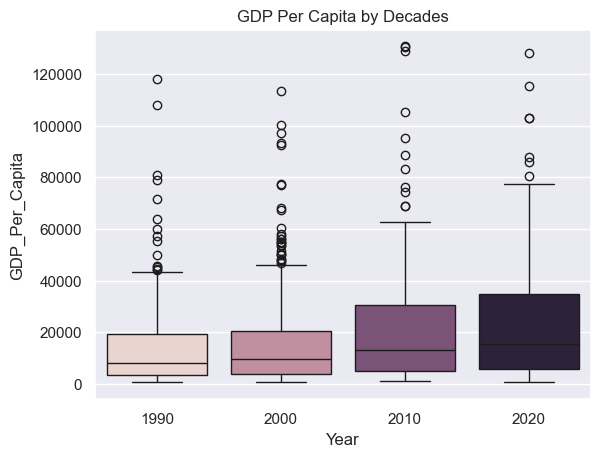

In [39]:
sns.boxplot(data=gdp_decades, x='Year', y='GDP_Per_Capita', hue='Year')
plt.title('GDP Per Capita by Decades')
plt.legend().remove()
plt.show();

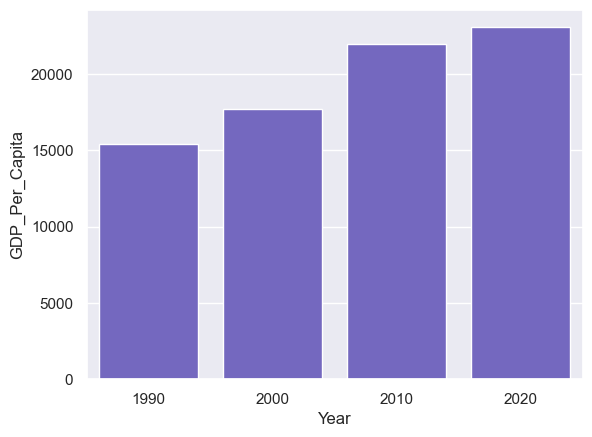

In [40]:
sns.barplot(x='Year', y='GDP_Per_Capita', data=gdp_decades, errorbar = None, color = 'slateblue')
plt.show()

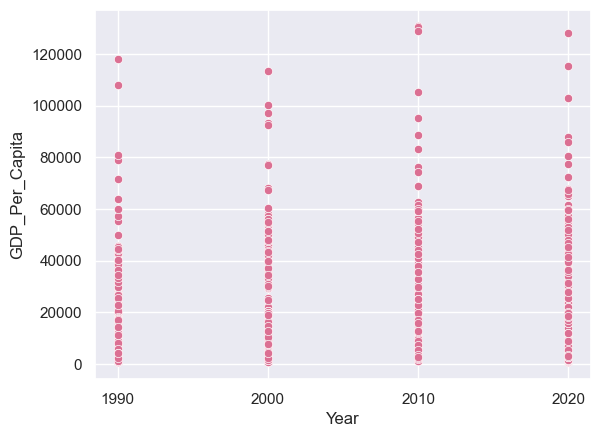

In [42]:
gdp_filtered = gdp_decades.dropna(subset=['GDP_Per_Capita'])
sns.scatterplot(x=gdp_filtered['Year'], y=gdp_filtered['GDP_Per_Capita'], color = 'palevioletred')
plt.xticks(sorted(gdp_filtered['Year'].unique()))
plt.show()

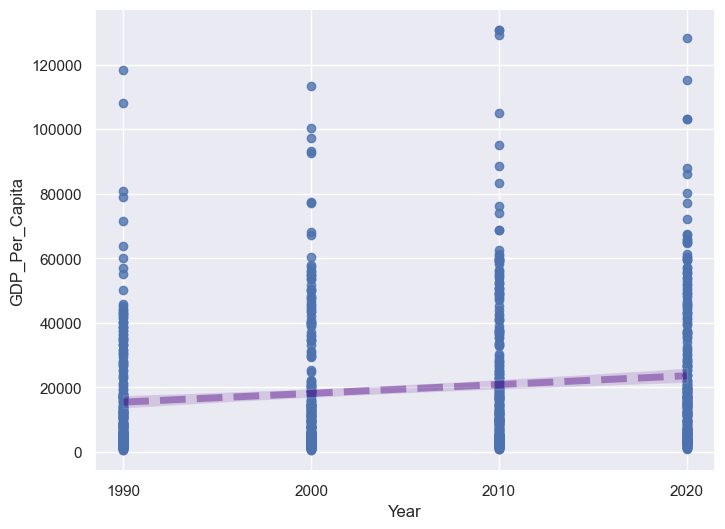

In [41]:
gdp_filtered = gdp_decades.dropna(subset=['GDP_Per_Capita'])
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x=gdp_filtered["Year"], y=gdp_filtered["GDP_Per_Capita"], line_kws={"color": "indigo","alpha": 0.4,"lw": 5,"ls": "--"},ax=ax)
plt.xticks(sorted(gdp_filtered['Year'].unique()))
plt.show()

In [43]:
over_100k = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]

In [44]:
first_case = over_100k.sort_values(by="Year", ascending=True).head(1)
print(first_case)

    Country  Year  GDP_Per_Capita
974  Brunei  1990   118163.683198


Brunei first GDP over 100k, in 1990

In [45]:
gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341
6514,Singapore,2020,115304.149459
6119,Qatar,2020,103061.913414
3493,Ireland,2020,102989.787335
741,Bermuda,2020,87894.401174
...,...,...,...
5133,Mozambique,2020,1466.124765
6699,Somalia,2020,1396.053436
1734,Dem. Rep. Congo,2020,1277.632863
1302,Central African Republic,2020,1136.570530


Luxembourg had highest GDP in 2020

In [46]:
luxembourg_gdp = gdp_df[gdp_df['Country']=='Luxembourg']

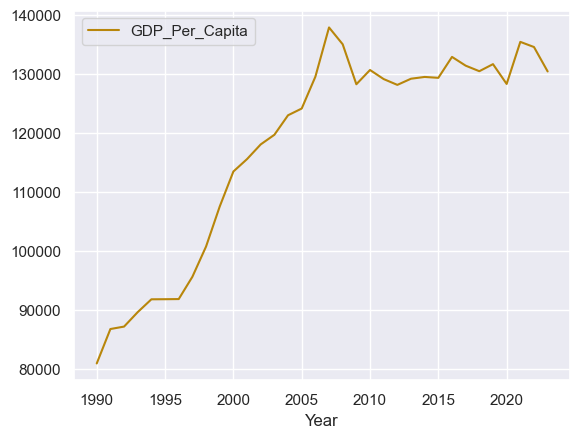

In [47]:
luxembourg_gdp.plot(x='Year', y='GDP_Per_Capita', kind='line', grid=True, color='darkgoldenrod')
plt.show()

In [48]:
gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = True)

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765
...,...,...,...
741,Bermuda,2020,87894.401174
3493,Ireland,2020,102989.787335
6119,Qatar,2020,103061.913414
6514,Singapore,2020,115304.149459


Burundi had lowest GDP in 2020

In [49]:
burundi_gdp = gdp_df[gdp_df['Country']=='Burundi']

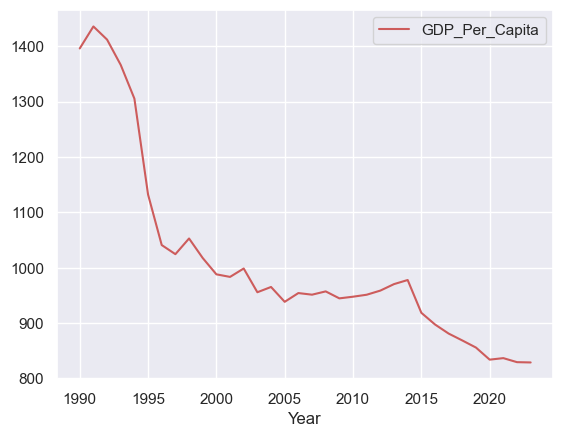

In [50]:
burundi_gdp.plot(x='Year', y='GDP_Per_Capita', kind='line', grid=True, color='indianred')
plt.show()

In [51]:
internet_df = pd.read_csv(r'C:\Users\user\workspace\c11\Python\data\internet_use.csv', nrows=6083)

In [52]:
internet_df.head(5)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [53]:
internet_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


In [54]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [55]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


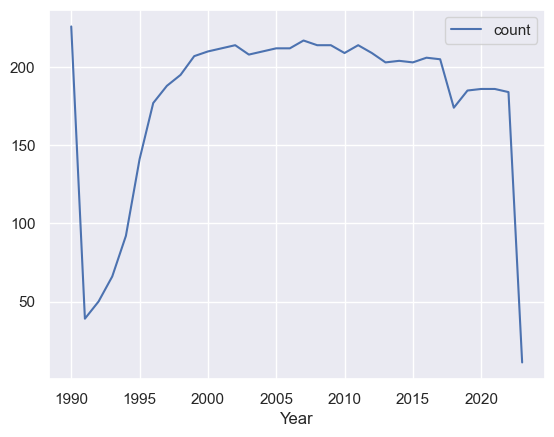

In [59]:
internet_df.Year.value_counts().to_frame().reset_index().sort_values('Year').plot('Year', 'count');

very low number of observations for 2023

In [64]:
internet_df.loc[internet_df.Internet_Users_Pct>0].sort_values('Year')

,Country,Year,Internet_Users_Pct
4197,Norway,1990,0.707299
2829,Italy,1990,0.017545
3980,Netherlands (Kingdom of the),1990,0.334387
2192,Germany,1990,0.125892
2796,Israel,1990,0.110774
...,...,...,...
3141,Latvia,2023,92.187900
677,Bosnia and Herzegovina,2023,83.377200
427,Bangladesh,2023,44.502700
5266,Sweden,2023,95.703300


In [65]:
non_zero = internet_df[internet_df['Internet_Users_Pct'] > 0]

In [66]:
first_year = non_zero.sort_values(by="Year", ascending=True).head(1)
print(first_year)

     Country  Year  Internet_Users_Pct
4197  Norway  1990            0.707299


Norway 1990 had 0.7% internet users

In [67]:
internet_years = (2000, 2014)

In [68]:
internet_years = internet_df.loc[internet_df.Year.isin(internet_years)]

In [69]:
type(internet_years)

pandas.core.frame.DataFrame

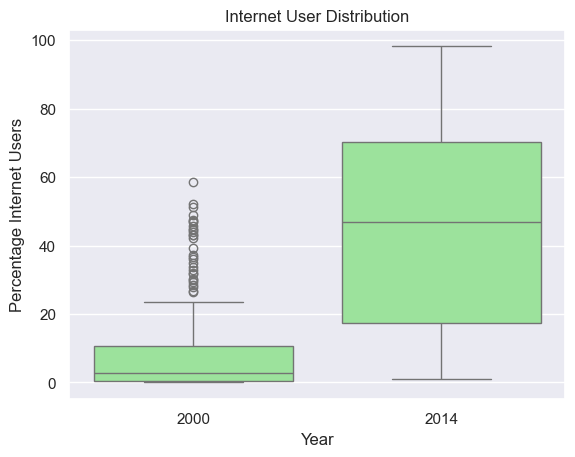

In [71]:
sns.boxplot(x='Year', y='Internet_Users_Pct', data=internet_years, color = 'lightgreen')
plt.title('Internet User Distribution')
plt.ylabel('Percentage Internet Users')
plt.show()

Internet users increase from under 10% in 2000 to almost 50% in 2014

In [107]:
len( internet_years.loc[(internet_years.Year == 2014) & (internet_years.Internet_Users_Pct < 5)] )

10

In [74]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country', 'Year'], how='outer')

In [75]:
gdp_and_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2000,1617.826475,NaN
2,Afghanistan,2001,1454.110782,0.004723
3,Afghanistan,2002,1774.308743,0.004561
4,Afghanistan,2003,1815.928200,0.087891


In [76]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9494,Zimbabwe,2019,3294.806084,26.5883
9495,Zimbabwe,2020,2987.269823,29.2986
9496,Zimbabwe,2021,3184.785451,32.4616
9497,Zimbabwe,2022,3323.121932,32.5615
9498,Zimbabwe,2023,3442.251327,NaN


In [77]:
gdpint2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

In [78]:
type(gdpint2014)

pandas.core.frame.DataFrame

In [79]:
gdpint2014.shape

(285, 4)

In [80]:
gdpint2014.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
15,Afghanistan,2014,3017.942544,7.0
49,Africa Eastern and Southern,2014,4052.851526,NaN
83,Africa Western and Central,2014,4816.917355,NaN
117,Albania,2014,12788.747231,54.3
151,Algeria,2014,15073.762940,29.5


In [81]:
top3_2014 = gdpint2014.sort_values(by="Internet_Users_Pct", ascending=False).head(3)
print(top3_2014)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
3944                      Iceland  2014    57981.199448              98.158
2867  Falkland (Malvinas) Islands  2014             NaN              97.600
824                       Bermuda  2014    92298.387811              96.800


In [89]:
top3_facet = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Iceland', 'Bermuda', 'Falkland (Malvinas) Islands'])]

In [90]:
type(top3_facet)

pandas.core.frame.DataFrame

In [91]:
top3_facet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
800,Bermuda,1990,79109.890650,0.0000
801,Bermuda,1991,75754.494259,NaN
802,Bermuda,1992,75160.932166,NaN
803,Bermuda,1993,76883.813796,NaN
804,Bermuda,1994,76850.912239,NaN
...,...,...,...,...
3949,Iceland,2019,65065.905682,99.5049
3950,Iceland,2020,59575.190393,99.5328
3951,Iceland,2021,61685.835611,99.6870
3952,Iceland,2022,65563.920870,99.8565


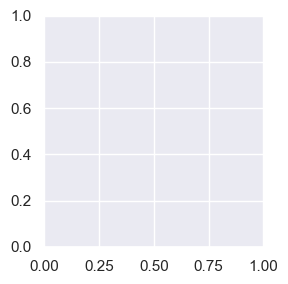

In [92]:
sns.FacetGrid(top3_facet);

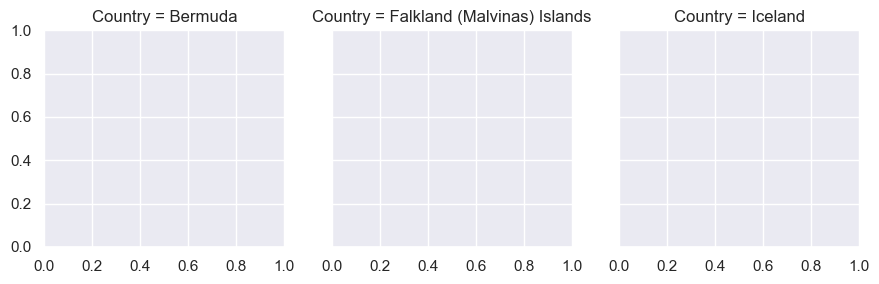

In [93]:
sns.FacetGrid(top3_facet, col = "Country");

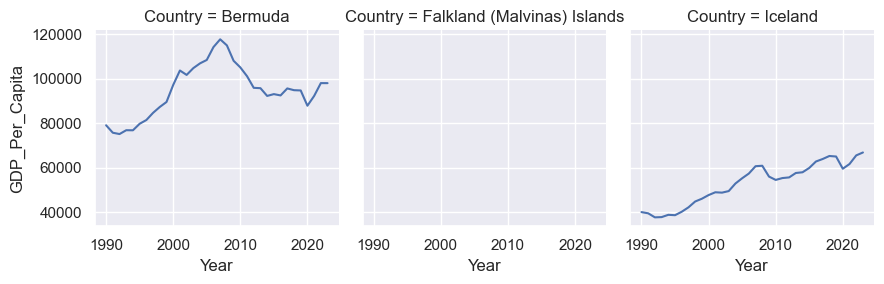

In [94]:
g=sns.FacetGrid(top3_facet, col = "Country")
g.map_dataframe(sns.lineplot, x="Year", y="GDP_Per_Capita");

steady GDP incr in Iceland over time, Bermuda much higher to start, had big spike in 2008, no data for Falkland Islands

In [95]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

In [96]:
gdp_and_internet_use_2014.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
15,Afghanistan,2014,3017.942544,7.0
49,Africa Eastern and Southern,2014,4052.851526,NaN
83,Africa Western and Central,2014,4816.917355,NaN
117,Albania,2014,12788.747231,54.3
151,Algeria,2014,15073.762940,29.5


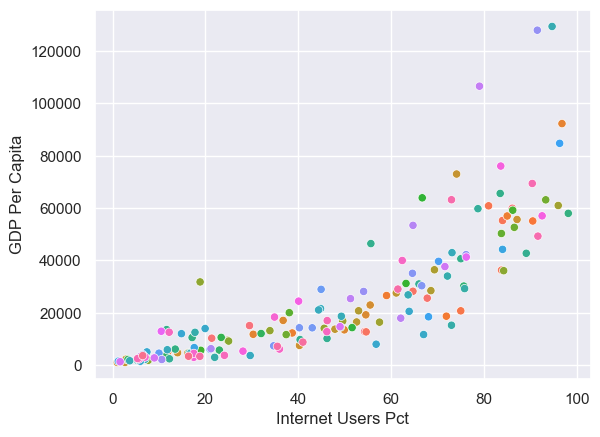

In [97]:
sns.scatterplot(data=gdp_and_internet_use_2014, x="Internet_Users_Pct", y="GDP_Per_Capita", hue="Country")
plt.legend().remove()
plt.xlabel("Internet Users Pct")
plt.ylabel("GDP Per Capita");

internet usage generally increases as GDP does, but some countries with low GDP still see high internet usage whereas all countries with the highest GDP also have high internet usage

In [102]:
gdp_and_internet_use_2014.loc[:, "GDP_group"] = pd.qcut(gdp_and_internet_use_2014["GDP_Per_Capita"], q=3, labels=["Low", "Medium", "High"])

In [103]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
15,Afghanistan,2014,3017.942544,7.0000,Low
49,Africa Eastern and Southern,2014,4052.851526,NaN,Low
83,Africa Western and Central,2014,4816.917355,NaN,Low
117,Albania,2014,12788.747231,54.3000,Medium
151,Algeria,2014,15073.762940,29.5000,Medium
...,...,...,...,...,...
9361,West Bank and Gaza,2014,5990.426615,NaN,Low
9395,World,2014,17307.606891,NaN,Medium
9424,Yemen,2014,NaN,22.5500,NaN
9455,Zambia,2014,3585.577485,6.5000,Low


In [105]:
gdp_and_internet_use_2014.GDP_group.value_counts()

GDP_group
High      83
Low       82
Medium    82
Name: count, dtype: int64

In [90]:
median_internet_users = (gdp_and_internet_use_2014.groupby("GDP_group", as_index=False, observed=True)["Internet_Users_Pct"].median())

print(median_internet_users)

  GDP_group  Internet_Users_Pct
0       Low             11.6000
1    Medium             44.5945
2      High             75.9800


Internet users go up as GDP goes up